# Tutorial on climatologies and trends
In this tutorial we will use the WEkEO Jupyterhub to access and analyse data from the WEkEO HDA API Client. The tutorial comprises the following steps:

1. [Search and download](#search_download) data using the Wekeo data viewer and the API client: We will focus on ERA5 reanalysis data of 2 metre (near-surface) temperature.
2. [Read data](#read_data): Once downloaded, we will read and understand the data, including its variables and coordinates.
3. [View and plot data](#view_plot): We will see how the mean temperature varies globally, and how the Earth is warming by plotting time-series of global anomalies.
4. [Analyse data](#analyse_data) over the Arctic: We will focus on a subset over the Arctic and compare the rate of warming between seasons.

## <a id='search_download'></a>1. Search and download data

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) client of the HDA, and importing the various python libraries that we will need.

#### Import libraries

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [1]:
# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
#Add land/ocean Masking
from global_land_mask import globe

import os
import sys
import json
from zipfile import ZipFile
import time
import base64
from IPython.core.display import HTML

import requests
import warnings
warnings.filterwarnings('ignore')

## <a id='read_data'></a> WEkEO HDA API Client

The WEkEO HDA client is a python based library. It provides support for both Python 2.7.x and Python 3.

In order to install the WEkEO HDA client via the package management system pip, you have to running on Unix/Linux the command shown below.

In [2]:
pip install -U hda

Note: you may need to restart the kernel to use updated packages.


Please verify the following requirements are installed before skipping to the next step:
   - Python 3
   - requests
   - tqdm

In [3]:
import requests
import tqdm

### Load WEkEO HDA client

The hda client provides a fully compliant Python 3 client that can be used to search and download products using the Harmonized Data Access WEkEO API.
HDA is RESTful interface allowing users to search and download WEkEO datasets.
Documentation about its usage can be found at the <a href='https://www.wekeo.eu/' target='_blank'>WEkEO website</a>.

In [4]:
from hda import Client, Configuration

# Follow tuturial to Set Up 
Then he could copy the code below in the file "$HOME/.hdarc" (in your Unix/Linux environment) and adapt the following template with the credentials of your WEkEO account
### your WEkEO API username and password (needs to be in '  ')
user_name = '#############'
password = '#############'

In [5]:
dataset_id = "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS"

In [6]:
{
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "itemsPerPage": 200,
  "startIndex": 0
}

{'dataset_id': 'EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS',
 'itemsPerPage': 200,
 'startIndex': 0}

In [32]:
data = {
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "product_type": [
    "monthly_averaged_reanalysis"
  ],
  "variable": [
    "2m_temperature", "Land-sea Mask",
  ],
  "year": [
    "1979",
    "1980",
    "1981",
    "1982",
    "1983",
    "1984",
    "1985",
    "1986",
    "1987",
    "1988",
    "1989",
    "1990",
    "1991",
    "1992",
    "1993",
    "1994",
    "1995",
    "1996",
    "1997",
    "1998",
    "1999",
    "2000",
    "2001",
    "2002",
    "2003",
    "2004",
    "2005",
    "2006",
    "2007",
    "2008",
    "2009",
    "2010",
    "2011",
    "2012",
    "2013",
    "2014",
    "2015",
    "2016",
    "2017",
    "2018",
    "2019"
      ],
  "month": [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10",
    "11",
    "12"
  ],
  "time": [
    "00:00"
  ],
  "format": "netcdf"
}
data

{'dataset_id': 'EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS',
 'product_type': ['monthly_averaged_reanalysis'],
 'variable': ['2m_temperature', 'Land-sea Mask'],
 'year': ['1979',
  '1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019'],
 'month': ['01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12'],
 'time': ['00:00'],
 'format': 'netcdf'}

#### Download requested data
##### As a final step, you can use directly the client to download data as in following example.

In [33]:
conf = Configuration(user = "agbeli", password = "ClimateDataX2024!")
#hda_client = Client(config = conf)
#c = Client(debug=True)
c = Client(config=conf, max_workers=12)
matches = c.search(data)
print(matches)
matches.download()

SearchResults[items=1,volume=ND]


In [34]:
data

{'dataset_id': 'EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS',
 'product_type': ['monthly_averaged_reanalysis'],
 'variable': ['2m_temperature', 'Land-sea Mask'],
 'year': ['1979',
  '1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019'],
 'month': ['01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12'],
 'time': ['00:00'],
 'format': 'netcdf',
 'startIndex': 0,
 'itemsPerPage': 100}

## <a id='read_data'></a>2. Read Data

Now that we have downloaded the data, we can start to play ...

We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data.
The code below searches in the directory all the netCDF file and provides the filename of the last one downloaded. Then the xarray's function `xr.open_dataset()` is used to open the netCDF file as `xarray.Dataset`. 

In [5]:
# get filename of latest .nc downloaded file 
files = [file for file in os.listdir(".") if (file.lower().endswith('.nc'))]
list_nc_file = []

for file in sorted(files,key=os.path.getmtime, reverse=True):
    list_nc_file.append(file)
    
print(f'Selected netCDF file: {list_nc_file[0]}')  

Selected netCDF file: reanalysis-era5-single-levels-monthly-means-0f0ea3beda091eda2fb5b49969c468d2.nc


To read and process this data we will make use of the Xarray library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun! We will read the data from our NetCDF file into an Xarray **"dataset"**

In [6]:
# load file in WEkEO API
t2m = list_nc_file[0]

In [7]:
# Create Xarray Dataset
ds = xr.open_dataset(t2m)

Now we can query our newly created Xarray dataset ...

In [8]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 492)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    lsm        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-02 18:05:33 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

We see that the dataset has one variable called "t2m", which stands for "2 metre temperature", and three coordinates of longitude, latitude and time.

While an Xarray dataset may contain multiple variables, an Xarray data array holds a single multi-dimensional variable and its coordinates. To make the processing of the t2m data easier, we convert in into an Xarray data array.



In [29]:
ds.where(ds.lsm==1).mean(),ds.where(ds.lsm==0).mean(), ds.mean()

(<xarray.Dataset>
 Dimensions:  ()
 Data variables:
     t2m      float32 257.3
     lsm      float32 1.0,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     t2m      float32 284.1
     lsm      float32 0.0,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     t2m      float32 278.5
     lsm      float32 0.3359)

In [36]:
# Create Xarray Data Array
da_ocean,da_land, da = ds.where(ds.lsm==0)['t2m'],ds.where(ds.lsm==1)['t2m'], ds['t2m']

In [37]:
da_ocean.mean(), da_land.mean(), da.mean()

(<xarray.DataArray 't2m' ()>
 array(284.11642, dtype=float32),
 <xarray.DataArray 't2m' ()>
 array(257.34378, dtype=float32),
 <xarray.DataArray 't2m' ()>
 array(278.46045, dtype=float32))

## <a id='view_plot'></a>3. View and plot data

Now the fun part begins! Once our data is in the right format, there is no limit to what we can do with it! For example we can finally visualise the data to see what information it can provide.

#### View temporal mean for reference period

We will begin by creating a variable with the yearly means. Then we will extract the mean value for each geographic latitude and longitude for the period from 1981 to 2010. We will use this as a **reference period** with which to calculate **anomalies**.

Create a variable with the yearly means:

In [38]:
yearly_mean = da.groupby('time.year').mean('time')
yearly_mean_ocean = da_ocean.groupby('time.year').mean('time')
yearly_mean_land = da_land.groupby('time.year').mean('time')

Calculate mean temperature for a reference period of 1981 to 2010:

In [39]:
ref = yearly_mean.where((yearly_mean.year > 1979) & (yearly_mean.year < 2010), drop=True)
ref_mean = ref.mean(dim="year")
#Ocean
ref_ocean = yearly_mean_ocean.where((yearly_mean_ocean.year > 1979) & (yearly_mean_ocean.year < 2010), drop=True)
ref_mean_ocean = ref_ocean.mean(dim="year")
#Land
ref_land = yearly_mean_land.where((yearly_mean_land.year > 1979) & (yearly_mean_land.year < 2010), drop=True)
ref_mean_land = ref_land.mean(dim="year")


In [40]:
ref_mean_ocean.mean(), ref_mean_land.mean(), ref_mean.mean()

(<xarray.DataArray 't2m' ()>
 array(284.01538, dtype=float32),
 <xarray.DataArray 't2m' ()>
 array(257.23865, dtype=float32),
 <xarray.DataArray 't2m' ()>
 array(278.34488, dtype=float32))

Let us plot this to see how the mean temperature for this period varies globally:

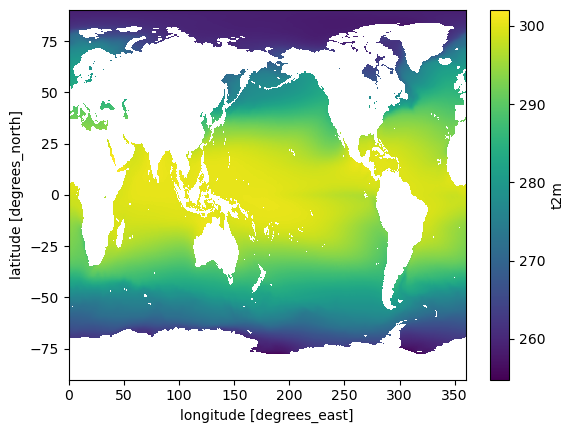

In [41]:
ref_mean_ocean.plot()

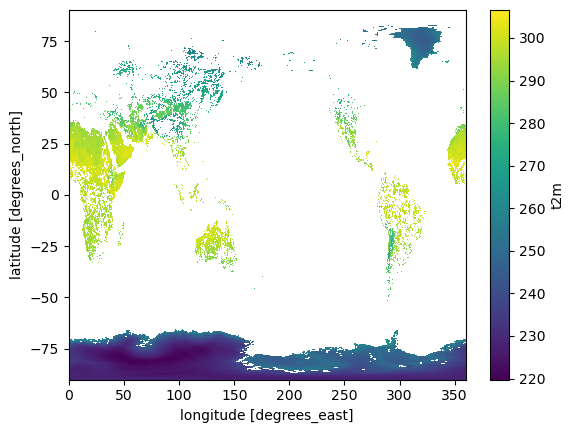

In [42]:
ref_mean_land.plot()

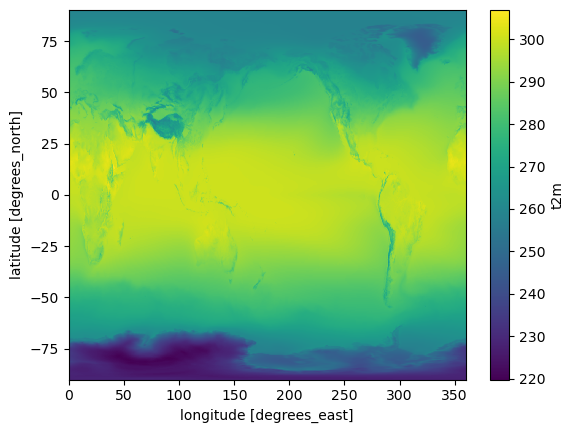

In [43]:
ref_mean.plot()

In [100]:
#Ocean Reference plot for land masked Data
#yearly_mean_landmask = land_mask_da.groupby('time.year','lsm').mean('time')

Notice the strong latitude gradient, and cold regions such as the Tibetan Plateau, the Andes and Greenland.

#### Plot global anomalies

We will now plot a global time series of annual temperature anomalies, defined as deviations in temperature from the reference mean.

Calculate the global mean for the reference period (1981 to 2010), and for the annual data from 1979 to 2019:

In [18]:
# global mean for reference period
ref_global = ref_mean.mean(["longitude", "latitude"])

# global mean for annual data
yearly_mean_global = yearly_mean.mean(["longitude", "latitude"])

We can now derive the anomalies by subtracting the global mean for the reference period from the annual means:

In [19]:
anomalies_global = yearly_mean_global - ref_global

Let's plot the annual global temperature anomalies over time, to see if there are any trends.

In [20]:
# Create a dashed horizontal line to show where the reference temperature lies
mean_line = xr.DataArray(0.0, coords=[('year', np.arange(1979,1979))])

Text(0.5, 1.0, 'Global anomalies of t2m from 1979 to 2019')

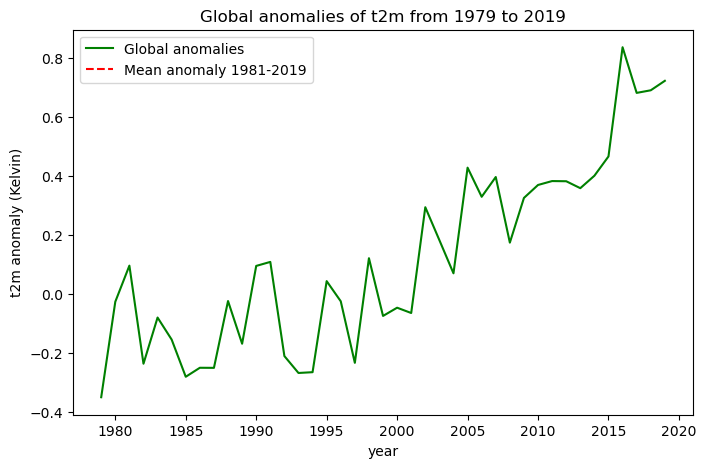

In [21]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot()
ax.set_ylabel('t2m anomaly (Kelvin)')
ax.set_xlabel('year')
ax.plot(anomalies_global.year, anomalies_global, color='green', label='Global anomalies')
ax.plot(mean_line.year, mean_line, color='red', linestyle='dashed', label='Mean anomaly 1981-2019')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Global anomalies of t2m from 1979 to 2019')

Notice a clear trend in global temperature!

## <a id='analyse_data'></a>4. Analyse data over the Arctic
We will now focus our attention over the Arctic. Here we will repeat the analysis above for this subset area. In addition, we will compare variations in the mean temperature of different seasons throughout the time series.

#### Plot mean Arctic temperature

First we have to create a subset for the Arctic Circle (above lat 66°33'N, or 66.55 in decimal degrees)

In [107]:
arctic = da.where(da.latitude >= 56.55, drop=True)

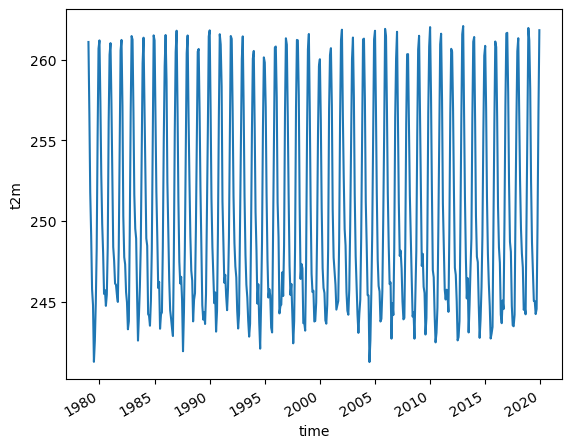

In [112]:
#Plot for antarctic mean temperature

antarctic = da.where(da.latitude <= -56.55, drop=True)
antarctic_mean_1979_to_2019 = antarctic.mean(dim="time")
antarctic_mean = antarctic.mean(["longitude", "latitude"])
antarctic_mean.plot()

Calculate mean 2 metre temperature in period 1979 to 2019:

In [95]:
arctic_mean_1979_to_2019 = arctic.mean(dim="time")

Now let's plot this data in a map projection that facilitates visualisation of the Arctic:

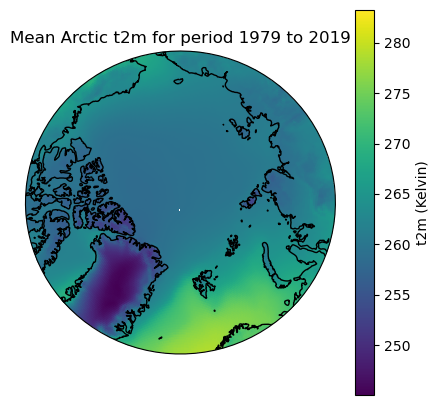

In [24]:
# create the figure panel 
fig = plt.figure(figsize=(5,5))
# create the map using the cartopy Orthographic projection, selecting the North Pole
ax = plt.subplot(1,1,1, projection=ccrs.Orthographic(central_latitude=90.0))
# add coastlines
ax.coastlines()
# compute a circle in axes coordinates, which we can use as a boundary for the map.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
# set boundary
ax.set_extent([-180,180, 66.55,90], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
# provide a title
ax.set_title('Mean Arctic t2m for period 1979 to 2019')
# plot t2m
pp = plt.pcolormesh(arctic_mean_1979_to_2019.longitude, arctic_mean_1979_to_2019.latitude,
                    arctic_mean_1979_to_2019, cmap='viridis', transform=ccrs.PlateCarree())
# add colourbar
cbar = plt.colorbar(pp)
cbar.set_label(label='t2m (Kelvin)')

#### Plot monthly time series
Let's plot the monthly time series to see if we can identify any trends.

In [25]:
arctic_mean = arctic.mean(["longitude", "latitude"])

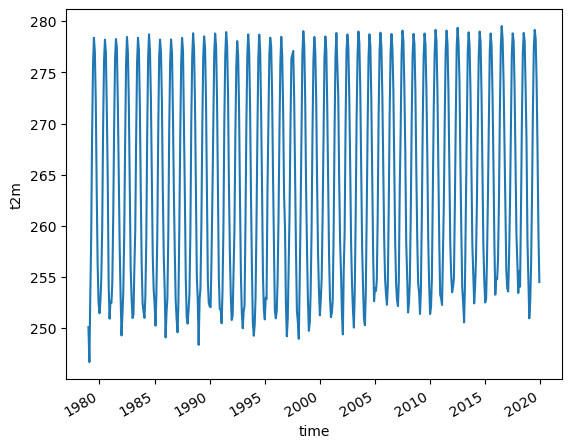

In [26]:
arctic_mean.plot()

Can you identify any global warming? The strong seasonal variations are evident throughout each year, but it is difficult to see any clear long-term trends.

#### Plot yearly time series
Now let's plot a time series of yearly averages. By removing the seasonal variations, perhaps we can identify some long-term trends.

In [27]:
arctic_yearly_mean = arctic_mean.groupby('time.year').mean('time')

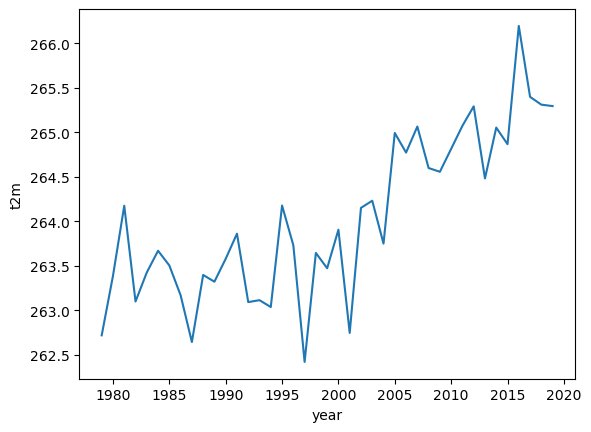

In [28]:
arctic_yearly_mean.plot()

Now we can clearly see a positive trend in warming throughout the time-series!

#### Plot seasonal time series

It may be interesting to compare trends in the mean temperature of different seasons throughout the time series. Do they vary? Are some seasons more constant over time, while others fluctuate?

In [29]:
# Create rolling average of three months
arctic_roll = arctic_mean.rolling(time=3, center=True).mean()

In [30]:
MAM = arctic_roll[3:-8:12] # MAM = March, April, May (Spring)
JJA = arctic_roll[6:-5:12] # JJA = June, July, August (Summer)
SON = arctic_roll[9:-2:12] # SON = September, October, November (Autumn)
DJF = arctic_roll[12:-11:12] # DJF = December, January, February (Winter)

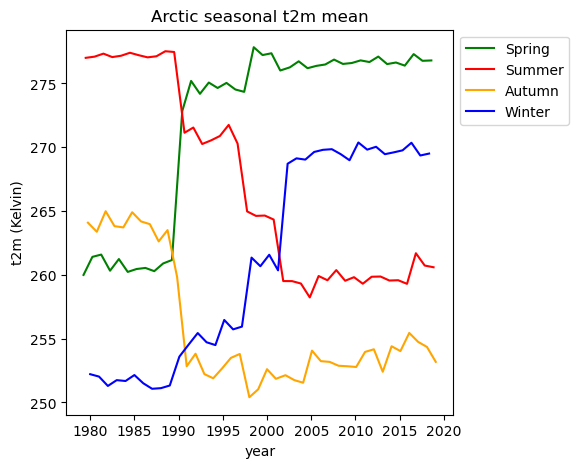

In [31]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.set_ylabel('t2m (Kelvin)')
ax.set_xlabel('year')
ax.plot(MAM.time, MAM, color='green', label='Spring')
ax.plot(JJA.time, JJA, color='red', label='Summer')
ax.plot(SON.time, SON, color='orange', label='Autumn')
ax.plot(DJF.time, DJF, color='blue', label='Winter')
ax.set_title('Arctic seasonal t2m mean')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')

Note the difference in variability of seasonal mean t2m throughout the time series: mean summer temperatures are more constant than in other seasons.